In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [287]:
plt.style.use("ggplot")

In [399]:
train_df = pd.read_csv("./train.csv")
test_df = pd.read_csv("./test.csv")

In [400]:
train_df_len = len(train_df)
test_df_len = len(test_df)

In [401]:
train_df_len

8693

In [402]:
def combine_df(train_df, test_df):
    combined_df = pd.concat([train_df, test_df], ignore_index=True)
    return combined_df

def seperate_df(combined_df, train_df_len, test_df_len):
    train_df = combined_df.iloc[:train_df_len]
    test_df = combined_df.iloc[train_df_len:]
    return train_df, test_df

full_df =combine_df(train_df, test_df)
len(full_df)

12970

In [403]:

full_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [404]:
full_df[["VRDeck","ShoppingMall","FoodCourt","Spa","RoomService"]] = full_df[["VRDeck","ShoppingMall","FoodCourt","Spa","RoomService"]].fillna(0)
full_df["Total_Expenses"] = full_df["RoomService"] + full_df["FoodCourt"] + full_df["ShoppingMall"] + full_df["Spa"] + full_df["VRDeck"]

In [405]:
full_df["PassengerId"].head()

0    0001_01
1    0002_01
2    0003_01
3    0003_02
4    0004_01
Name: PassengerId, dtype: object

In [406]:
full_df["PassengerId_code"] = (full_df["PassengerId"].apply(lambda x: x.split("_")[0]) ).astype(int)
full_df["PassengerId_fam"] = full_df["PassengerId"].apply(lambda x: str(x.split("_")[1])[1]) 
full_df["PassengerId_fam"] = full_df["PassengerId_fam"].astype(int)

<h2>Passenger Family Count vs CryoSleep Ratios and Destinations</h2>

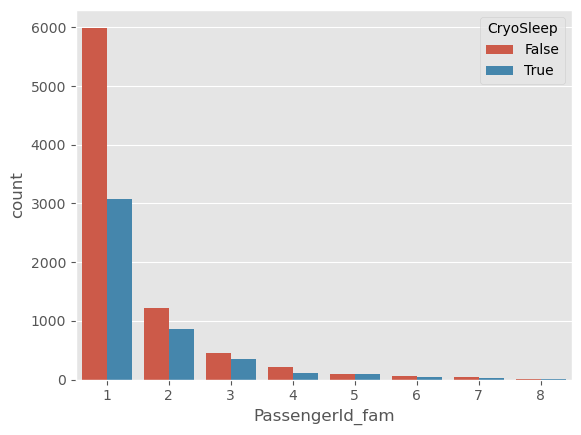

In [407]:
sns.countplot(data=full_df, x="PassengerId_fam", hue="CryoSleep");

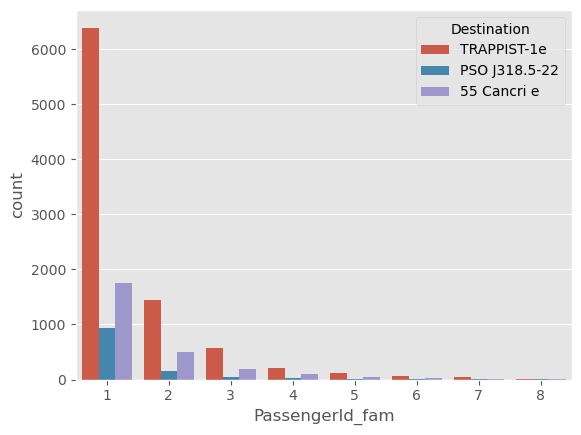

In [408]:
sns.countplot(data=full_df, x="PassengerId_fam", hue="Destination");

In [409]:
full_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Total_Expenses,PassengerId_code,PassengerId_fam
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,2,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,3,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,3,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,4,1


In [410]:
train_df, test_df =seperate_df(full_df, train_df_len, test_df_len)

In [422]:
# Created dx for visualize Pairplot
dx = train_df[["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","Total_Expenses","Transported"]].copy()
dx.fillna(0 ,inplace=True)

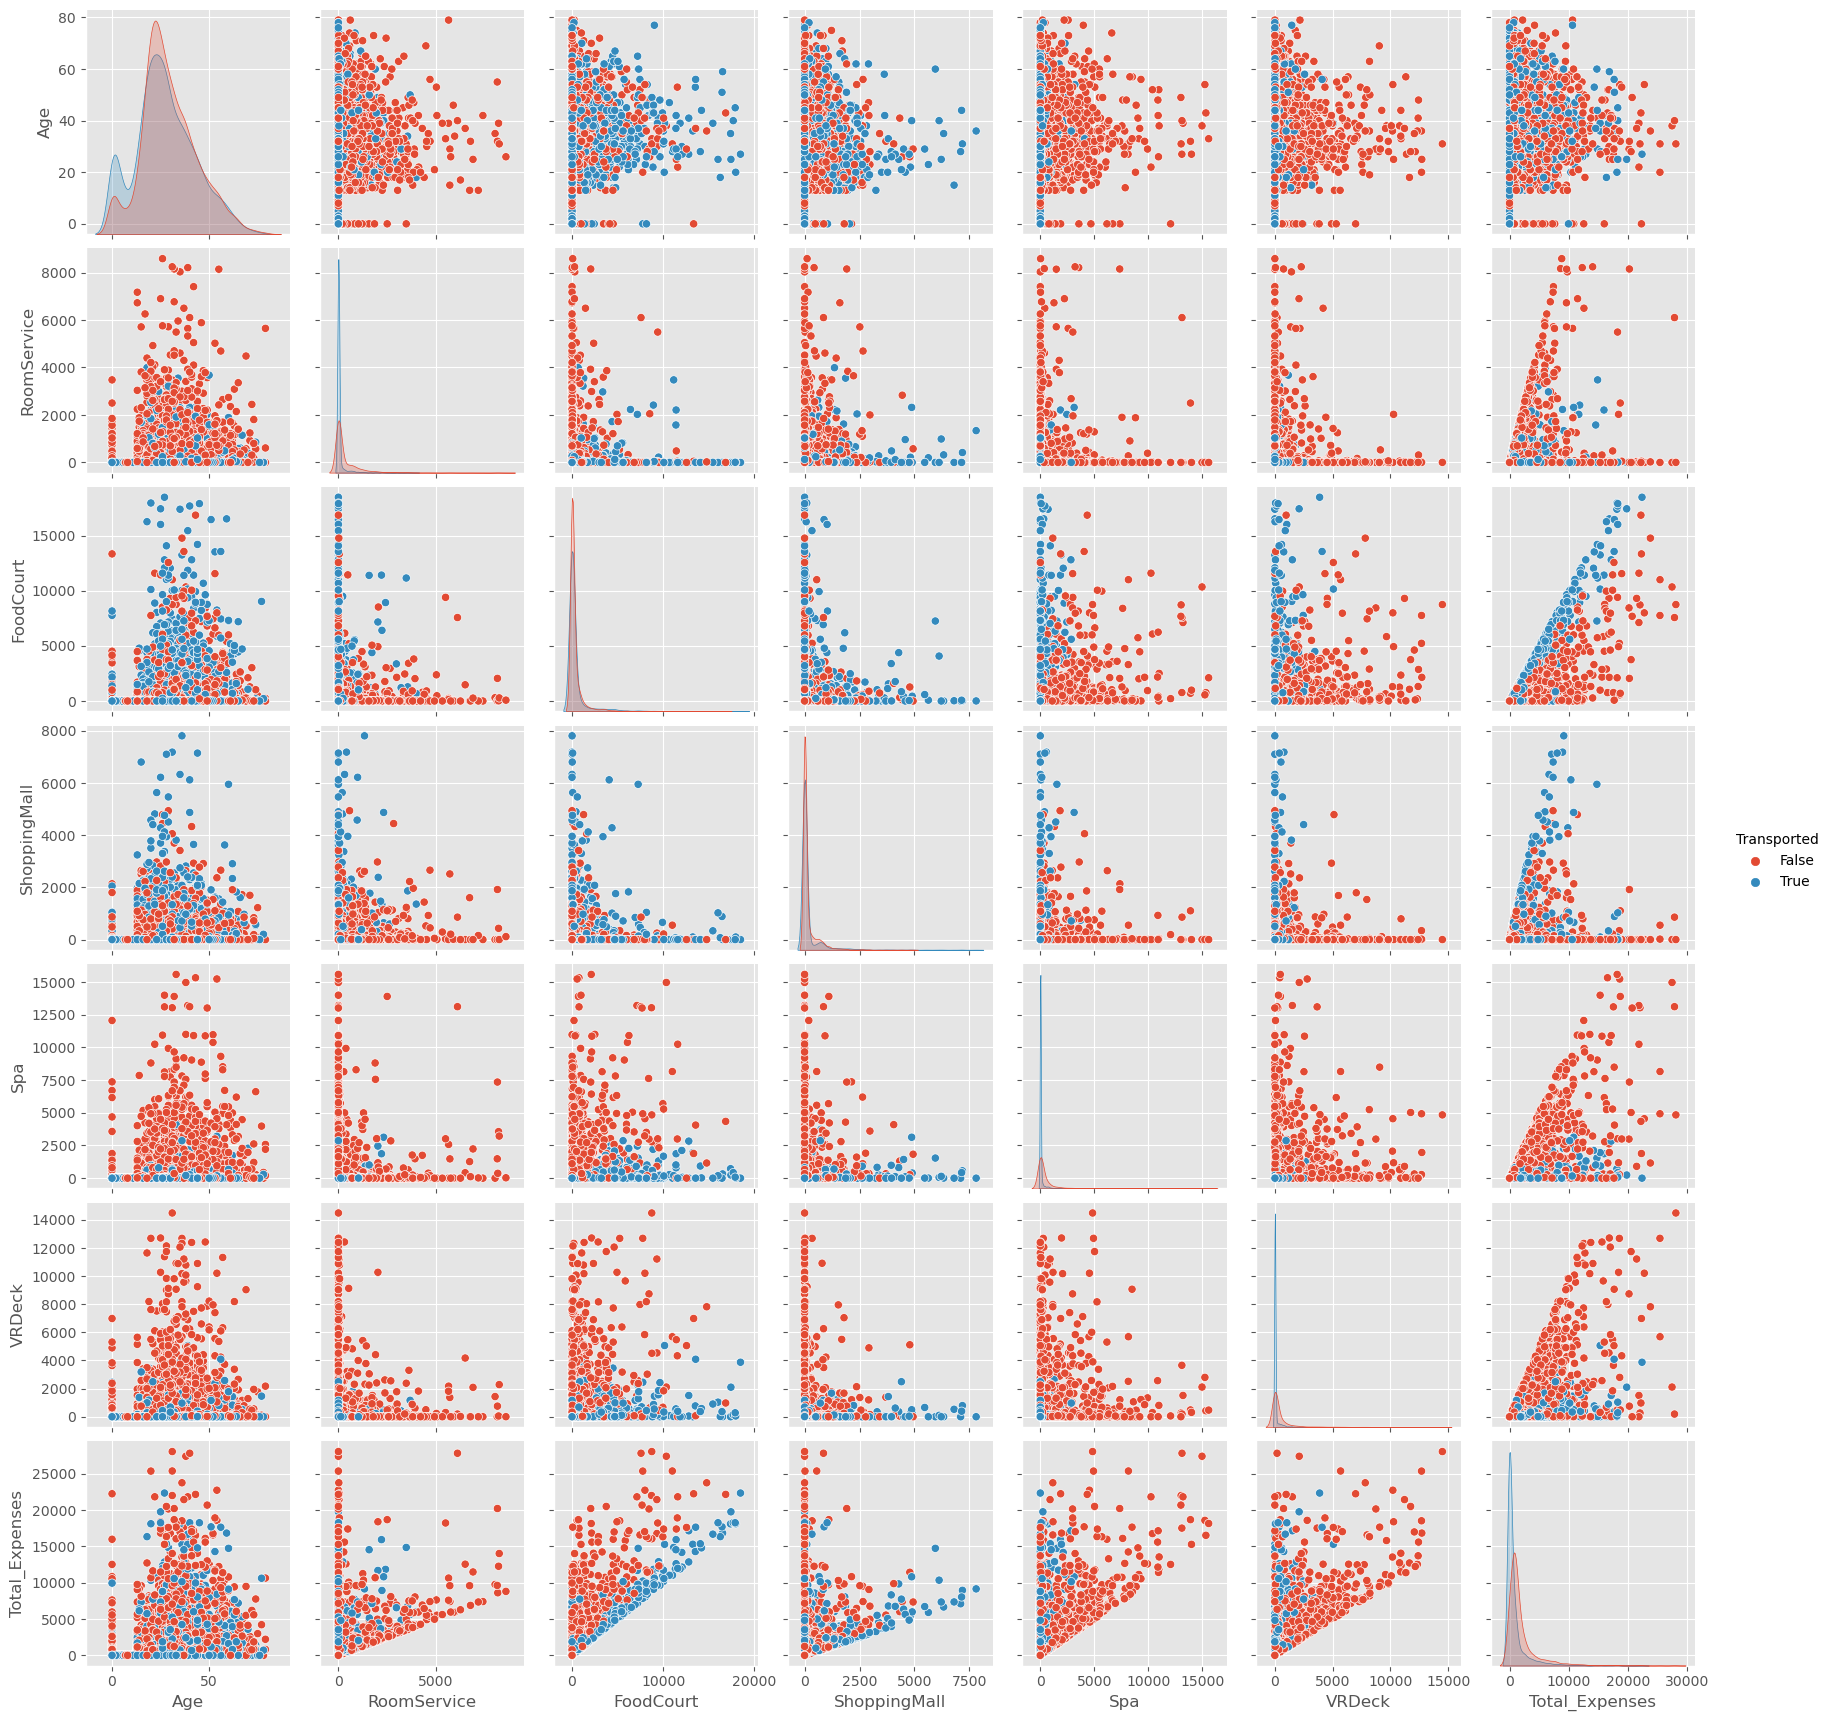

In [423]:
sns.pairplot(dx, hue="Transported")

In [424]:
# Dealing with Outliers
# train_df[train_df["ShoppingMall"] > 9000]
# train_df[train_df["RoomService"] > 9500]
# train_df[train_df["VRDeck"] > 15000]
# train_df[train_df["FoodCourt"] > 20000]
# train_df[train_df["Spa"] > 16000]
train_df[train_df["Total_Expenses"] > 25000]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Total_Expenses,PassengerId_code,PassengerId_fam
154,0177_01,Europa,False,B/2/S,TRAPPIST-1e,38.0,False,0.0,10346.0,1.0,14970.0,2111.0,Toperon Iniouser,False,27428.0,177,1
358,0395_01,Europa,False,B/17/P,55 Cancri e,31.0,True,0.0,11003.0,552.0,8157.0,5688.0,Meropus Hervel,False,25400.0,395,1
3916,4181_05,Europa,False,C/133/P,55 Cancri e,31.0,False,2.0,8747.0,0.0,4840.0,14485.0,Wezena Frattyring,False,28074.0,4181,5
6509,6866_02,Europa,False,C/253/S,55 Cancri e,40.0,False,6103.0,7570.0,860.0,13117.0,192.0,Dscha Hetforhaft,False,27842.0,6866,2
8171,8729_02,Europa,False,E/559/P,TRAPPIST-1e,20.0,False,0.0,7759.0,18.0,4925.0,12685.0,Charda Rewmid,False,25387.0,8729,2


In [425]:
# Dealing with Outliers
train_df = train_df[train_df["ShoppingMall"] < 9000]
train_df = train_df[train_df["RoomService"] < 9500]
train_df = train_df[train_df["VRDeck"] < 15000]
train_df = train_df[train_df["FoodCourt"] < 20000]
train_df = train_df[train_df["Spa"] < 16000]
train_df = train_df[train_df["Total_Expenses"] < 25000]

In [426]:
train_df_len = len(train_df)
test_df_len = len(test_df)

full_df = combine_df(train_df,test_df)

In [427]:
full_df["CryoSleep"] = full_df["CryoSleep"].astype(bool)

<Axes: xlabel='CryoSleep', ylabel='Total_Expenses'>

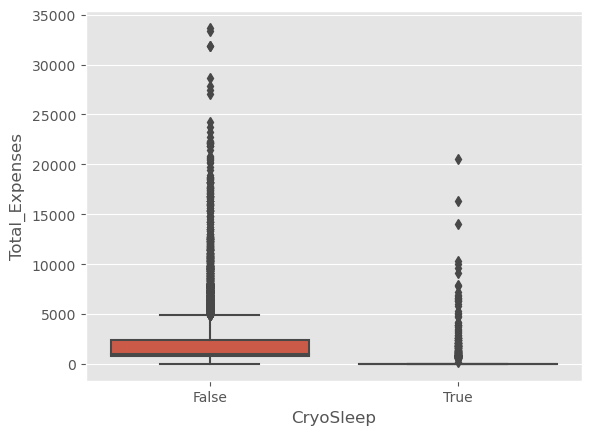

In [444]:
sns.boxplot(data=full_df, y="Total_Expenses", x="CryoSleep")

In [454]:
full_df["CryoSleep"].isnull().sum()

0

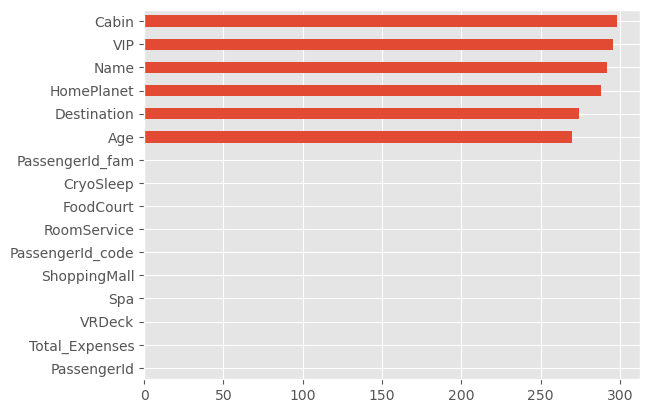

In [455]:
# Calculating Null Values 
full_df.isnull().sum().sort_values()[:-1].plot(kind="barh");

<p> Some Basic Countplot for EDA </p>

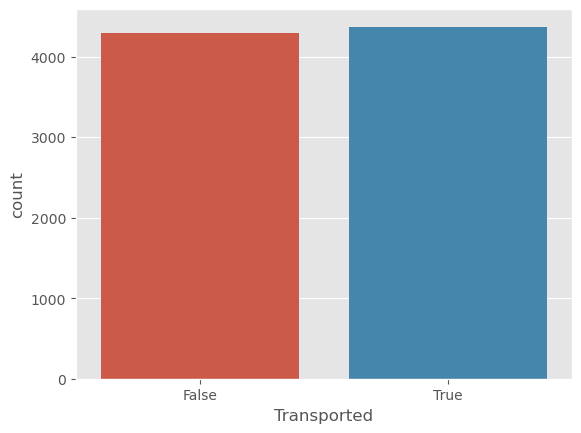

In [429]:
sns.countplot(data=full_df, x="Transported");

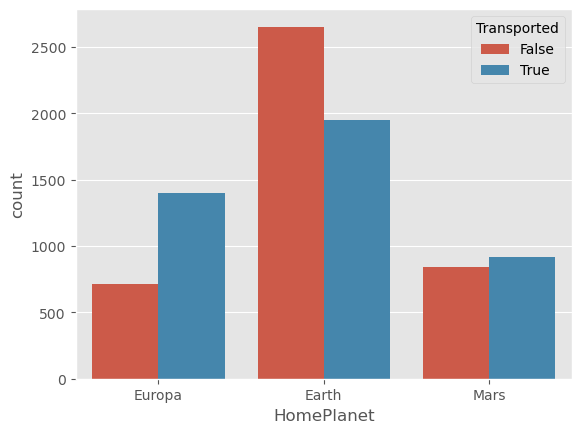

In [430]:
sns.countplot(data=full_df, x="HomePlanet", hue="Transported");

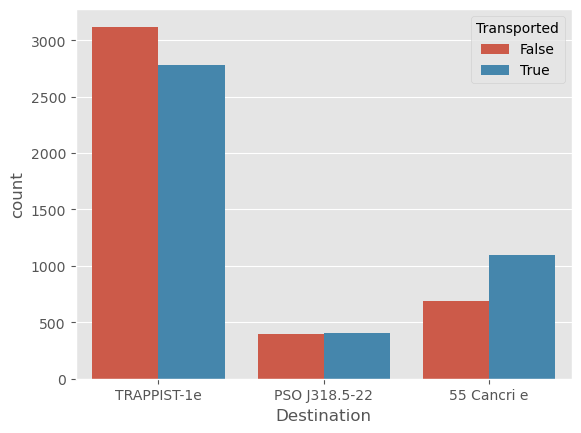

In [431]:
sns.countplot(data=full_df, x="Destination", hue="Transported");

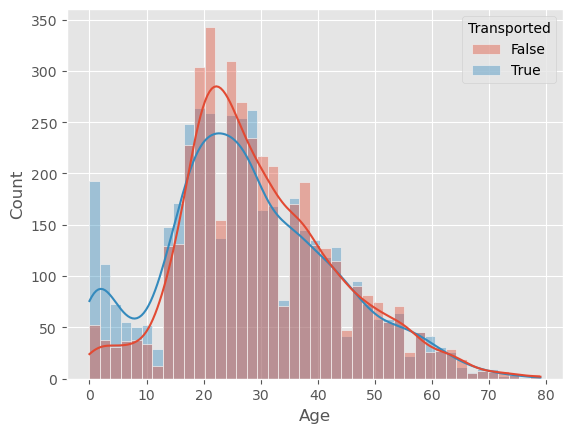

In [432]:
sns.histplot(data=train_df, x="Age", hue="Transported", alpha=0.4, kde=True);

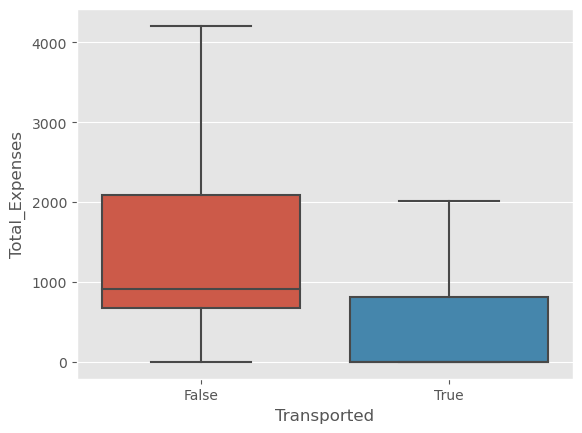

In [84]:
sns.boxplot(data=full_df, y="Total_Expenses", x="Transported", showfliers=False);

<Axes: xlabel='Transported', ylabel='Age'>

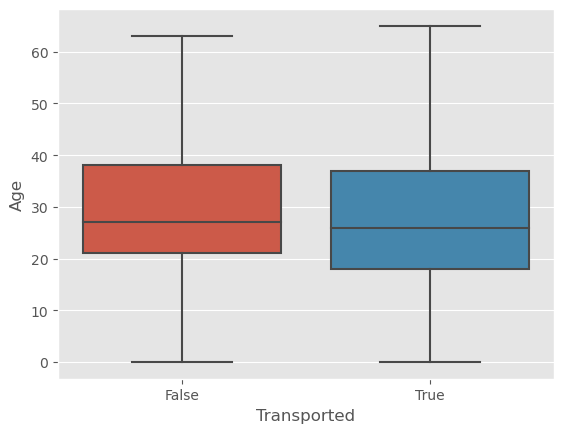

In [32]:
sns.boxplot(data=train_df, y="Age", x="Transported", showfliers=False)

In [312]:
# Converting Total_expenses column to categoric bins
full_df['Total_Expenses_cat'] = pd.cut(full_df['Total_Expenses'], bins=5, labels=[0,1,2,3,4]).astype(int)
full_df['Total_Expenses_cat'].value_counts()

0    12364
1      462
2       86
3       24
4       10
Name: Total_Expenses_cat, dtype: int64

In [398]:
sns.boxplot(data=full_df, y=Total_Expenses, x="CryoSleep")

NameError: name 'Total_Expenses' is not defined

<p>Splitting Cabin and Deck numbers </p>

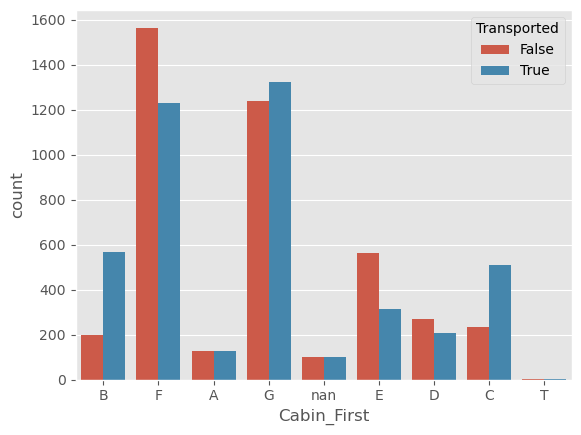

In [313]:
# Splitting Cabins 
full_df["Cabin"] = full_df["Cabin"].astype(str)
full_df["Cabin_First"] = full_df["Cabin"].apply(lambda x: (str(x).split("/"))[0])
full_df["Cabin_Third"] = full_df["Cabin"].apply(lambda x: str(x).split("/")[-1])
full_df["Cabin_Second"] = full_df["Cabin"].apply(lambda x: str(x).split("/")[1] if "/" in str(x) else str(x).split("/")[0])

sns.countplot(data=full_df, x="Cabin_First", hue="Transported");

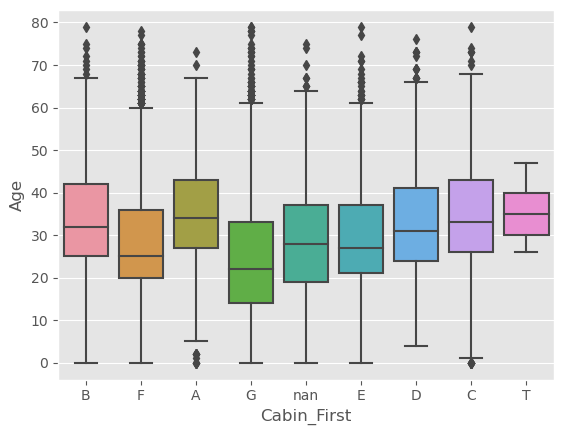

In [314]:
sns.boxplot(data=full_df, y="Age", x="Cabin_First");

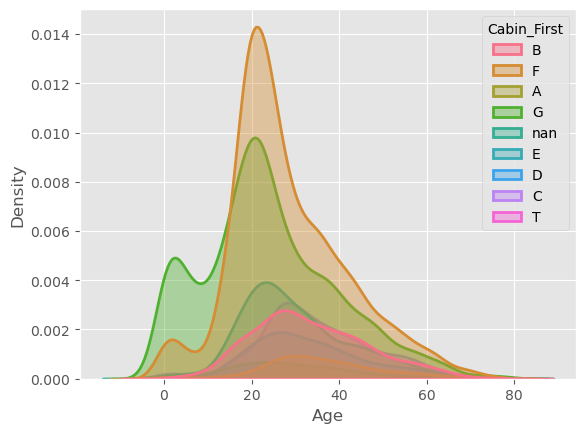

In [315]:
sns.kdeplot(data=full_df, x="Age", hue="Cabin_First", alpha=0.4, linewidth=2, fill=True);

In [316]:
full_df["Age"].isnull().sum()

270

<p> I will try to fill the null age values with the mean value of Cabin column <p>

In [317]:
# Calculate mean age for each Cabin category
mean_age_by_cabin = full_df.groupby('Cabin_First')['Age'].transform('mean')

# # Fill missing values in the Age column with the corresponding Cabin category mean
full_df['Age'].fillna(mean_age_by_cabin, inplace=True)

In [318]:
full_df["Age"].isnull().sum()

0

In [319]:
# Divide Age values into 5 bin (Category)
full_df['Age_band']=0
full_df.loc[full_df['Age']<=16,'Age_band']=0
full_df.loc[(full_df['Age']>16)&(full_df['Age']<=32),'Age_band']=1
full_df.loc[(full_df['Age']>32)&(full_df['Age']<=48),'Age_band']=2
full_df.loc[(full_df['Age']>48)&(full_df['Age']<=64),'Age_band']=3
full_df.loc[full_df['Age']>64,'Age_band']=4
full_df.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,Total_Expenses,PassengerId_code,PassengerId_fam,Total_Expenses_cat,Cabin_First,Cabin_Third,Cabin_Second,Age_band
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,Maham Ofracculy,False,0.0,1,1,0,B,P,0,2
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,Juanna Vines,True,736.0,2,1,0,F,S,0,1


<h2 style="color: DodgerBlue"> Now I will try to fill null values of HomePlanet and Destintion columns </h2>

In [320]:
print(f"HomePlanet null rows: {full_df['HomePlanet'].isnull().sum()}")
print(f"Destination null rows: {full_df['Destination'].isnull().sum()}")

HomePlanet null rows: 288
Destination null rows: 273


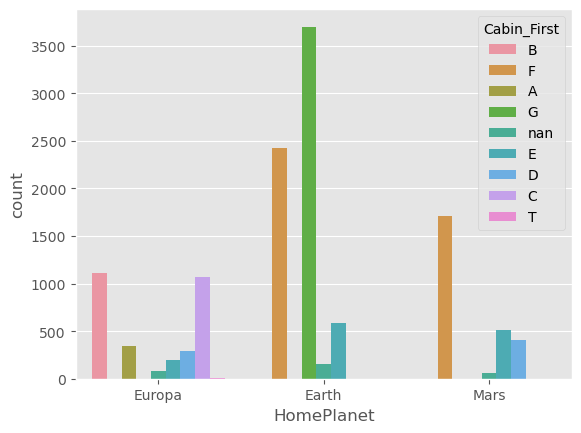

In [321]:
sns.countplot(data=full_df, x="HomePlanet", hue="Cabin_First");

In [322]:
# I could fill null values of HomePlanet columns with Earth if the passenger cabin is G
# Meanlike I will fill the null values of HomePlanet as Europa if the passenger is in the cabins (B, A or C)
full_df.loc[ full_df['HomePlanet'].isnull() & full_df["Cabin_First"].isin(["G"]), "HomePlanet"] = "Earth"
full_df.loc[ full_df['HomePlanet'].isnull() & full_df["Cabin_First"].isin(["B","A","C"]), "HomePlanet"] = "Europa"

print(f"HomePlanet null rows: {full_df['HomePlanet'].isnull().sum()}")

HomePlanet null rows: 161


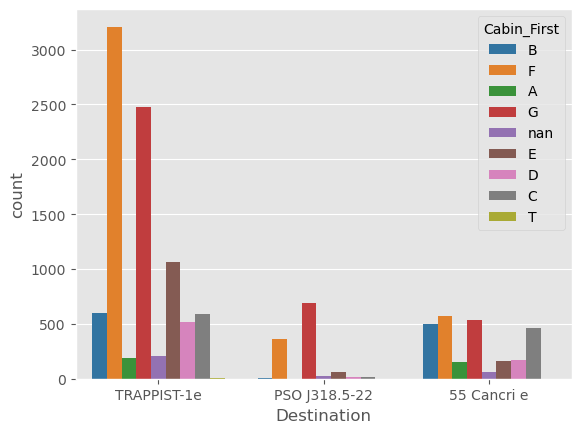

In [323]:
# Now lets check Destination and cabin counts
sns.countplot(data=full_df, x="Destination", hue="Cabin_First", palette="tab10");

In [324]:
# If the passenger is in the cabins F, G, E, I will fill the null values with TRAPPIST destintion
full_df.loc[ full_df['Destination'].isnull() & full_df["Cabin_First"].isin(["F","G", "E"]), "Destination"] = "TRAPPIST-1e"
print(f"Destination null rows: {full_df['Destination'].isnull().sum()}")

Destination null rows: 68


HomePlanet null rows: 161


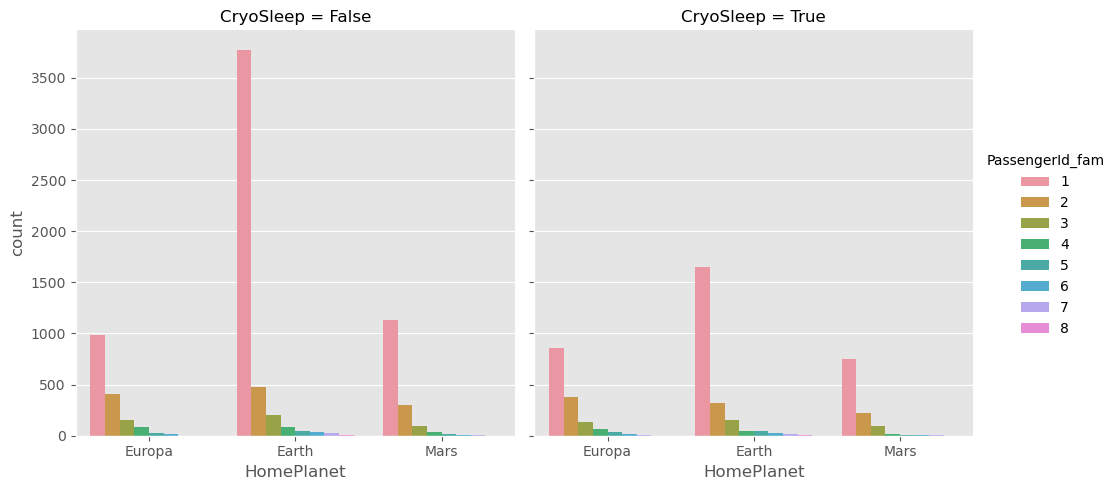

In [325]:
sns.catplot(kind="count", data=full_df, x="HomePlanet", hue="PassengerId_fam", col="CryoSleep");
print(f"HomePlanet null rows: {full_df['HomePlanet'].isnull().sum()}")


CryoSleep  Cabin_First
False      A               241
           B               494
           C               603
           D               538
           E              1039
           F              3287
           G              1674
           T                10
           nan             169
True       A               112
           B               634
           C               491
           D               182
           E               283
           F               952
           G              2107
           T                 1
           nan             129
Name: PassengerId, dtype: int64

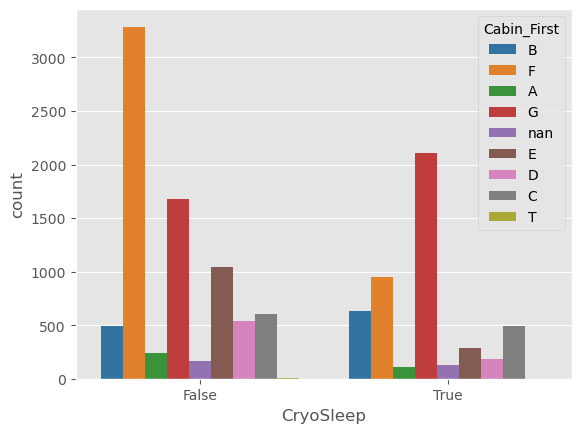

In [326]:
sns.countplot(data=full_df, x="CryoSleep", hue="Cabin_First", palette="tab10");
full_df.groupby(["CryoSleep", "Cabin_First"])["PassengerId"].count()

In [327]:
full_df.loc[ full_df['CryoSleep'].isnull() & full_df["Cabin_First"].isin(["F","E"]), "CryoSleep"] = False
full_df["CryoSleep"].isnull().sum()

0

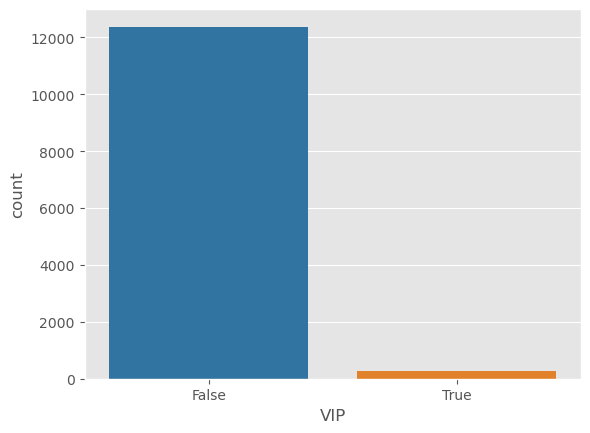

In [328]:
sns.countplot(data=full_df, x="VIP", palette="tab10");

In [329]:
full_df["VIP"].fillna(False, inplace=True)

In [330]:
full_df.isnull().sum()

PassengerId              0
HomePlanet             161
CryoSleep                0
Cabin                    0
Destination             68
Age                      0
VIP                      0
RoomService              0
FoodCourt                0
ShoppingMall             0
Spa                      0
VRDeck                   0
Name                   292
Transported           4277
Total_Expenses           0
PassengerId_code         0
PassengerId_fam          0
Total_Expenses_cat       0
Cabin_First              0
Cabin_Third              0
Cabin_Second             0
Age_band                 0
dtype: int64

In [331]:
full_df["Transported"] = full_df["Transported"].astype(bool)
full_df["CryoSleep"] = full_df["CryoSleep"].astype(bool)

In [362]:
full_df["RoomService"] = full_df["RoomService"].apply(lambda x: np.log(x) if x > 0 else x)
full_df["FoodCourt"] = full_df["FoodCourt"].apply(lambda x: np.log(x) if x > 0 else x)
full_df["ShoppingMall"] = full_df["ShoppingMall"].apply(lambda x: np.log(x) if x > 0 else x)
full_df["Spa"] = full_df["Spa"].apply(lambda x: np.log(x) if x > 0 else x)
full_df["VRDeck"] = full_df["VRDeck"].apply(lambda x: np.log(x) if x > 0 else x)

full_df["Total_Expenses"] = full_df["Total_Expenses"].apply(lambda x: np.log(x) if x > 0 else x)


In [363]:
train_df, test_df = seperate_df(full_df, train_df_len, test_df_len)

In [364]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8669 entries, 0 to 8668
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         8669 non-null   object 
 1   HomePlanet          8559 non-null   object 
 2   CryoSleep           8669 non-null   bool   
 3   Cabin               8669 non-null   object 
 4   Destination         8622 non-null   object 
 5   Age                 8669 non-null   float64
 6   VIP                 8669 non-null   bool   
 7   RoomService         8669 non-null   float64
 8   FoodCourt           8669 non-null   float64
 9   ShoppingMall        8669 non-null   float64
 10  Spa                 8669 non-null   float64
 11  VRDeck              8669 non-null   float64
 12  Name                8471 non-null   object 
 13  Transported         8669 non-null   bool   
 14  Total_Expenses      8669 non-null   float64
 15  PassengerId_code    8669 non-null   int32  
 16  Passen

In [365]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 8669 to 12945
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         4277 non-null   object 
 1   HomePlanet          4226 non-null   object 
 2   CryoSleep           4277 non-null   bool   
 3   Cabin               4277 non-null   object 
 4   Destination         4256 non-null   object 
 5   Age                 4277 non-null   float64
 6   VIP                 4277 non-null   bool   
 7   RoomService         4277 non-null   float64
 8   FoodCourt           4277 non-null   float64
 9   ShoppingMall        4277 non-null   float64
 10  Spa                 4277 non-null   float64
 11  VRDeck              4277 non-null   float64
 12  Name                4183 non-null   object 
 13  Transported         4277 non-null   bool   
 14  Total_Expenses      4277 non-null   float64
 15  PassengerId_code    4277 non-null   int32  
 16  Pa

In [366]:
cleaned_df.isnull().sum()

HomePlanet            0
CryoSleep             0
Destination           0
VIP                   0
RoomService           0
FoodCourt             0
ShoppingMall          0
Spa                   0
VRDeck                0
Transported           0
PassengerId_fam       0
Total_Expenses_cat    0
Cabin_First           0
Cabin_Third           0
Age_band              0
dtype: int64

In [367]:
cleaned_df = train_df.drop("Name", axis=1)

In [368]:
cleaned_df = cleaned_df.dropna(subset=["CryoSleep","HomePlanet","Destination"])

In [369]:
cleaned_df = cleaned_df.drop(["Total_Expenses","PassengerId","PassengerId_code","Cabin_Second","Cabin","Age"], axis=1)

In [370]:
cleaned_df.isnull().sum()

HomePlanet            0
CryoSleep             0
Destination           0
VIP                   0
RoomService           0
FoodCourt             0
ShoppingMall          0
Spa                   0
VRDeck                0
Transported           0
PassengerId_fam       0
Total_Expenses_cat    0
Cabin_First           0
Cabin_Third           0
Age_band              0
dtype: int64

In [371]:
cleaned_df_dummies = pd.get_dummies(cleaned_df)

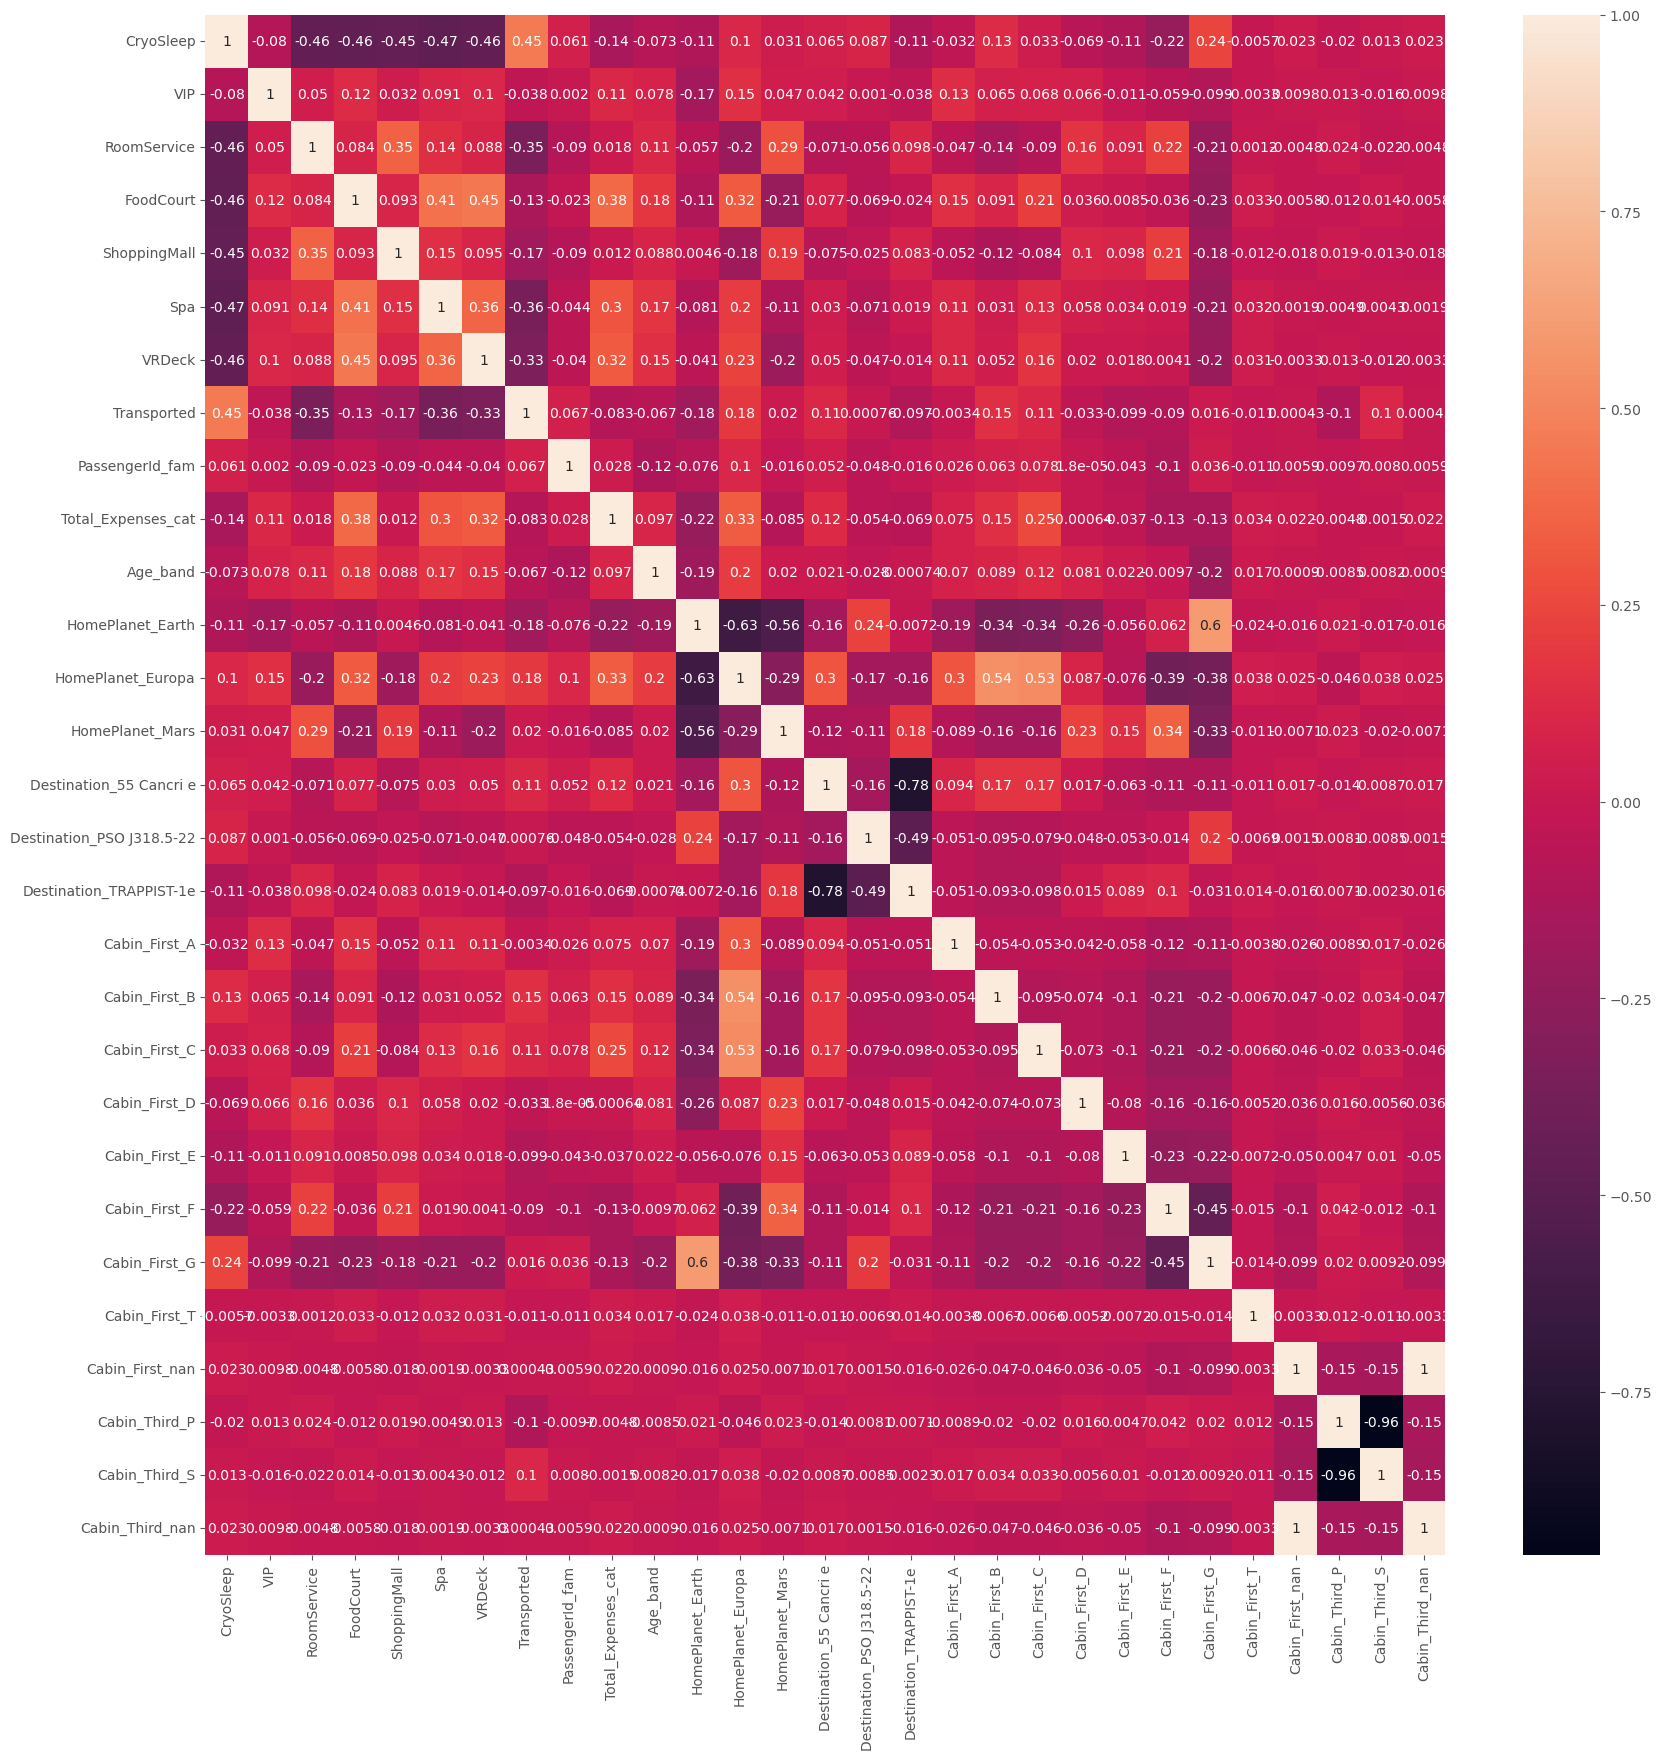

In [372]:
plt.figure(figsize=(20,20))
sns.heatmap(cleaned_df_dummies.corr(), annot=True);

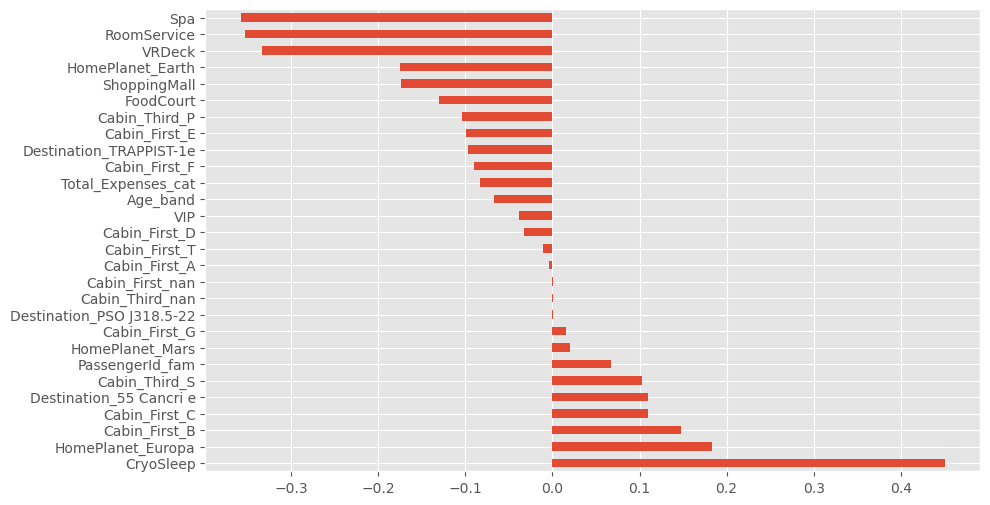

In [373]:
plt.figure(figsize=(10,6))
cleaned_df_dummies.corr()["Transported"].sort_values(ascending=False)[1:].plot(kind="barh");

In [375]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import StandardScaler

In [376]:
X = cleaned_df_dummies.drop("Transported", axis=1)
y = cleaned_df_dummies["Transported"]

In [377]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [378]:
scaler = StandardScaler()

In [379]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

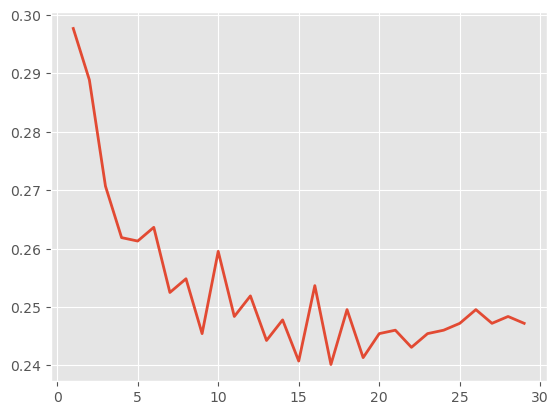

In [380]:
k_values = np.arange(1,30,1)
errors = []

for n in k_values:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(scaled_X_train, y_train)
    
    preds = knn.predict(scaled_X_test)
    
    error = 1- accuracy_score(y_test, preds)
    errors.append(error)
    
plt.plot(k_values, errors, linewidth=2)

In [381]:
# Define base models for cross validations
log_model = LogisticRegression()
dtree_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
ab_model = AdaBoostClassifier()
gb_model = GradientBoostingClassifier()
knn_model = KNeighborsClassifier(n_neighbors=14)
svc = SVC()

In [382]:
models = [log_model, dtree_model, rf_model, ab_model, gb_model, knn_model, svc]
models_name = ["LogisticReg", "DecisionTree", "RandomForest", "AdaBoost", "GradientBoost", "KNN", "SVC"]

accuracy_score = []

for model in models:

    scores = cross_val_score(model, scaled_X_train, y_train, scoring="accuracy", cv=10, n_jobs=6, verbose=1)
    accuracy_score.append(scores.mean())

my_dict = {"Model Name": models_name, "Accuracy Score": accuracy_score}
scores = pd.DataFrame(my_dict)
scores

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    7.0s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    3.3s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

,Model Name,Accuracy Score
0,LogisticReg,0.777355
1,DecisionTree,0.739314
2,RandomForest,0.791010
3,AdaBoost,0.788368
4,GradientBoost,0.797036
5,KNN,0.759730
6,SVC,0.787784


In [390]:
# Define the moderate grid search parameters for Gradient Boosting Classifier
param_grid = {
    'n_estimators': [50, 100, 120],
    'learning_rate': [0.05, 0.1, 0.5],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.5, 1.0]
}


# Create the Gradient Boosting Classifier model
gb_classifier = GradientBoostingClassifier()

# Perform grid search
grid_search = GridSearchCV(gb_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=6, verbose=10)

In [391]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=6,
             param_grid={'learning_rate': [0.05, 0.1, 0.5],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 10, 20],
                         'n_estimators': [50, 100, 120],
                         'subsample': [0.5, 1.0]},
             scoring='accuracy', verbose=10)

In [392]:
grid_search.best_estimator_

GradientBoostingClassifier(min_samples_leaf=4, min_samples_split=20,
                           subsample=0.5)

In [393]:
grid_search.best_score_

0.8032008726415858

              precision    recall  f1-score   support

       False       0.82      0.73      0.78       845
        True       0.76      0.84      0.80       858

    accuracy                           0.79      1703
   macro avg       0.79      0.79      0.79      1703
weighted avg       0.79      0.79      0.79      1703



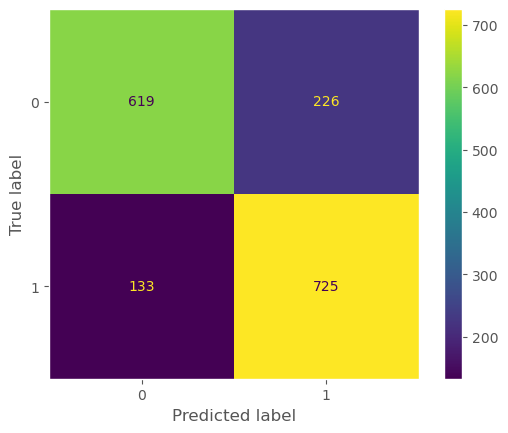

In [394]:
gb_preds = grid_search.best_estimator_.predict(X_test)

print(classification_report(y_test, gb_preds))
ConfusionMatrixDisplay(confusion_matrix(y_test, gb_preds)).plot()
plt.grid()

In [385]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3],
    'gamma': ['scale'],
}

svc_grid = GridSearchCV(svc, param_grid=param_grid, cv=5, n_jobs=6, verbose=2)

In [386]:
svc_grid.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=6,
             param_grid={'C': [0.01, 0.1, 1, 10], 'degree': [2, 3],
                         'gamma': ['scale'],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=2)

In [395]:
svc_grid.best_score_

0.7902778362200205

              precision    recall  f1-score   support

       False       0.81      0.73      0.77       845
        True       0.76      0.83      0.79       858

    accuracy                           0.78      1703
   macro avg       0.78      0.78      0.78      1703
weighted avg       0.78      0.78      0.78      1703



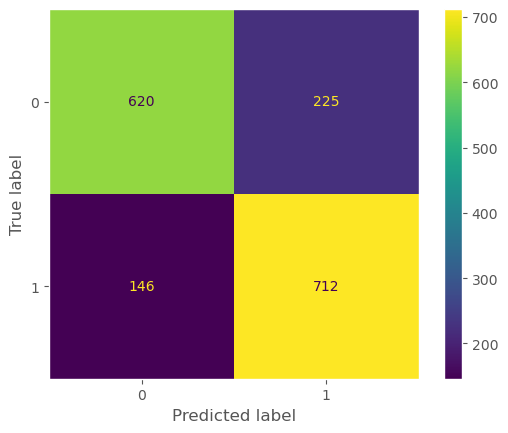

In [396]:
svc_preds = svc_grid.best_estimator_.predict(scaled_X_test)

print(classification_report(y_test, svc_preds))
ConfusionMatrixDisplay(confusion_matrix(y_test,svc_preds)).plot()
plt.grid()